In [ ]:
# Bibliotecas utilizadas
# %pip install matplotlib numpy geopanas pycountry folium

Questão 1

![alt text](<Enunciado Q1.png>)

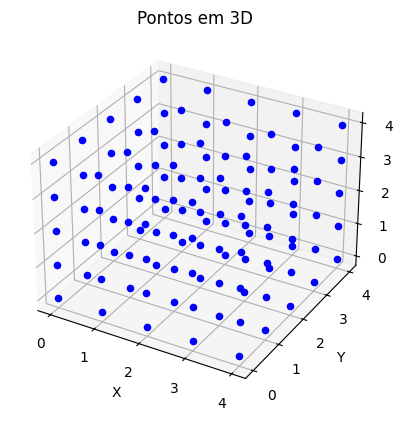

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = int(input("Insira o tamanho do lado do cubo: "))

while n <= 0:
    print("O tamanho do lado do cubo deve ser um número positivo.")
    n = int(input("Insira o tamanho do lado do cubo: "))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(n):
    x = i
    for j in range(n):
        y = j
        for k in range(n):
            z = k
            # print(f"({x}, {y}, {z})")  - Teste pra ver se os pontos estão corretos
            ax.scatter(x, y, z, color='blue', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Pontos em 3D')
plt.show()




![alt text](<Fluxograma Q1.png>)

Questão 2

![alt text](<Enunciado Q2.png>)

C:\Users\pedro.rosa\AppData\Local\Temp\ipykernel_12416\3055372126.py:18: RuntimeWarning: overflow encountered in scalar multiply
  x = r * x * (1 - x) #Coleta valores de x para cada r


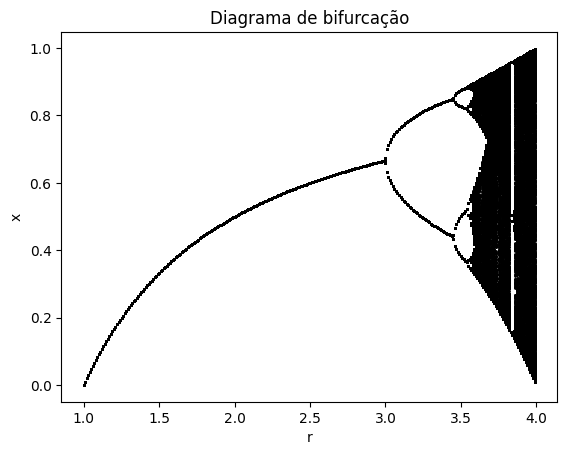

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# x' = rx(1-x)

lista_r0 = np.arange(1, 4.01, 0.01)

n1 = 1000
n2 = 1000
x0 = 0.5

lista_x = []
lista_r = []

for r in lista_r0: #Varre os r's entre 1 e 4
    x = x0
    for i in range(n1):
        x = r * x * (1 - x) #Coleta valores de x para cada r
    for j in range(n2):
        x = r * x * (1 - x)
        lista_x.append(x) #Armazena os valores de x
        lista_r.append(r) #Armazena os valores de r



plt.scatter(lista_r, lista_x, s=1, color='black')
plt.xlabel('r')
plt.ylabel('x')
plt.title('Diagrama de bifurcação')
plt.show()


![alt text](<Fluxograma Q2.png>)

Questão 3

O código abaixo coleta todas as ocorrências do fungo Ophiocordyceps desde 1975 e armazena os dados em um arquivo JSON para otimizar o processamento.

In [ ]:
import json
from pygbif import occurrences
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

def coletar_e_salvar_ocorrencias(scientificName, year_ini, year_fim, arquivo_json):
    limit = 300
    offset = 0
    todas_ocorrencias = []
    while True:
        res = occurrences.search(
            scientificName=scientificName,
            year=f"{year_ini},{year_fim}",
            limit=limit,
            offset=offset
        )
        results = res.get('results', [])
        if not results:
            break
        todas_ocorrencias.extend(results)
        offset += limit
        if offset >= res.get('count', 0):
            break
    # Salvar em arquivo JSON
    with open(arquivo_json, 'w', encoding='utf-8') as f:
        json.dump(todas_ocorrencias, f, ensure_ascii=False, indent=2)

# Exemplo de uso:
coletar_e_salvar_ocorrencias("Ophiocordycipitaceae", 1975, 2025, "ocorrencias_ophio.json")

O código abaixo coleta as informações do arquivo JSON e gera um gráfico que mostra a evolução do número de ocorrências do Ophiocordyceps à partir de 1975. 

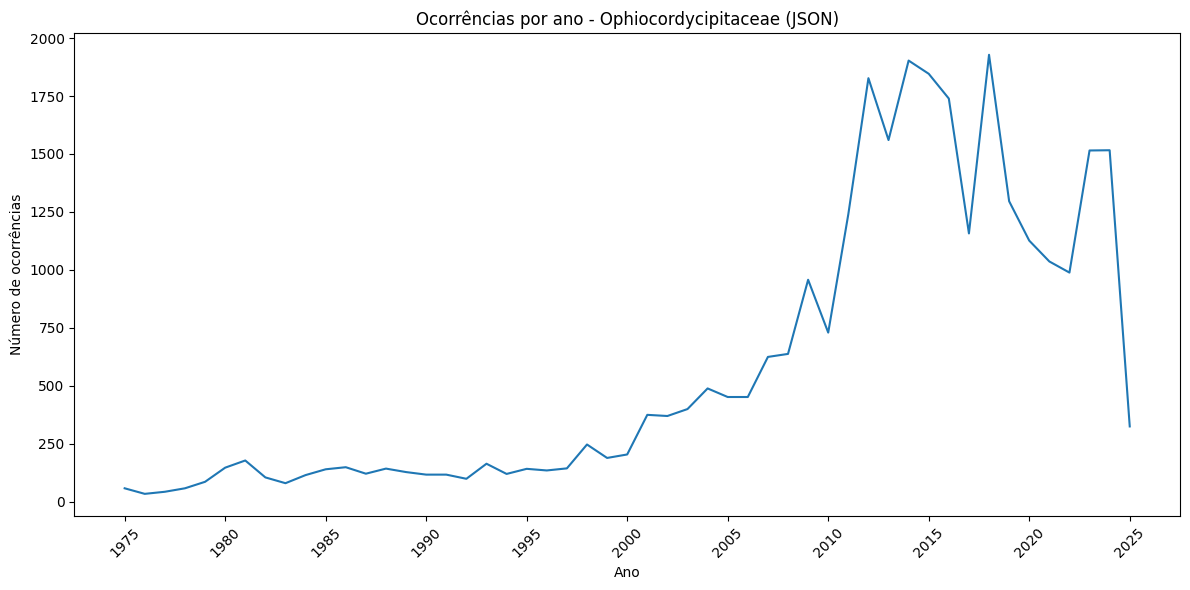

In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# Carregar as ocorrências do arquivo JSON
with open("ocorrencias_ophio.json", encoding="utf-8") as f:
    ocorrencias = json.load(f)

# Extrair os anos das datas
anos = []
for record in ocorrencias:
    data = record.get('eventDate')
    if data:
        try:
            ano = datetime.fromisoformat(data[:10]).year
            anos.append(ano)
        except Exception:
            continue

# Contar ocorrências por ano
contagem = Counter(anos)
anos_labels = sorted(contagem.keys())
ocorrencias_por_ano = [contagem[ano] for ano in anos_labels]

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(anos_labels, ocorrencias_por_ano)
if anos_labels:
    plt.xticks(range(min(anos_labels), max(anos_labels)+1, 5), rotation=45)
plt.xlabel('Ano')
plt.ylabel('Número de ocorrências')
plt.title('Ocorrências por ano - Ophiocordycipitaceae (JSON)')
plt.tight_layout()
plt.show()

O código abaixo gera um mapeamento das ocorrências do fungo Ophiocordyceps em todos os continentes.

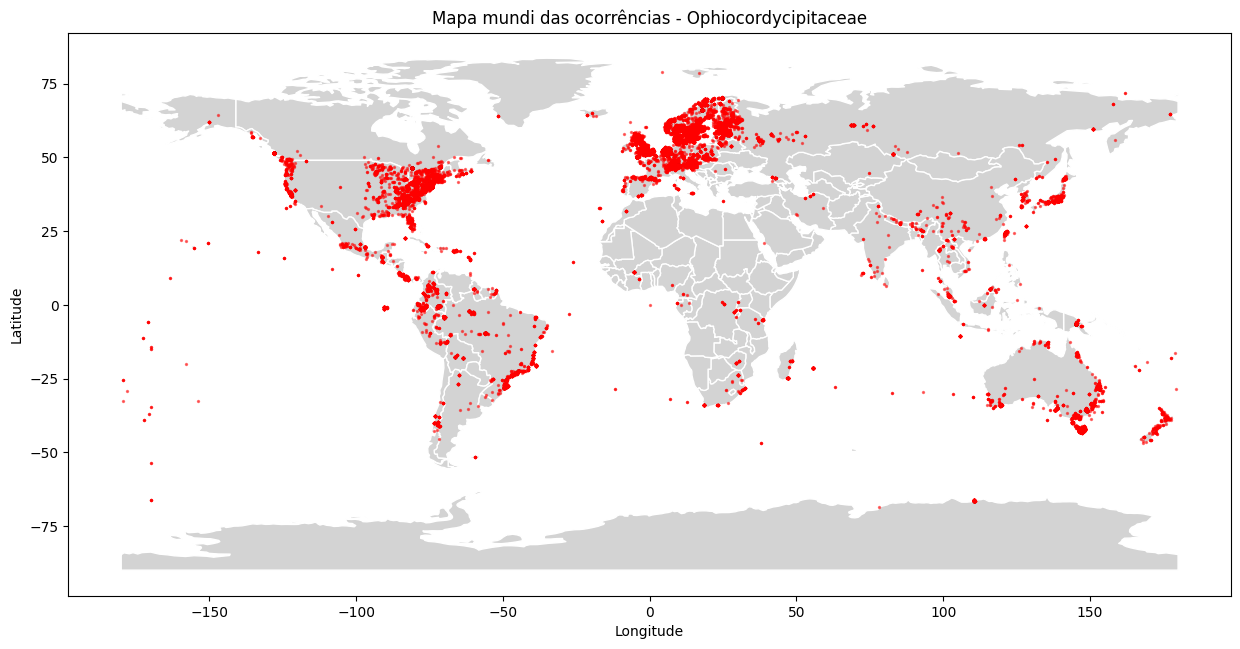

In [2]:
import json
from collections import Counter
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Carregar as ocorrências do arquivo JSON
with open("ocorrencias_ophio.json", encoding="utf-8") as f:
    ocorrencias = json.load(f)

# Extrair coordenadas das ocorrências
coordenadas = []
for record in ocorrencias:
    lat = record.get('decimalLatitude')
    lon = record.get('decimalLongitude')
    if lat is not None and lon is not None:
        try:
            coordenadas.append(Point(float(lon), float(lat)))
        except Exception:
            continue

# Criar GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=coordenadas, crs="EPSG:4326")

# Carregar mapa mundi
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Plotar mapa
fig, ax = plt.subplots(figsize=(15, 8))
world.plot(ax=ax, color='lightgray', edgecolor='white')

# Plotar densidade das ocorrências (hexbin)
if not gdf.empty:
    gdf.plot(ax=ax, markersize=2, alpha=0.5, color='red')
    plt.title('Mapa mundi das ocorrências - Ophiocordycipitaceae')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
else:
    plt.title('Nenhuma ocorrência georreferenciada encontrada.')

plt.show()

O código abaixo gera um mapeamento interativo de ocorrências do fungo Ophiocordyceps por continente.

In [2]:
import json
import geopandas as gpd
import folium
from collections import Counter, defaultdict
import pycountry

# Funções de conversão
def alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

def name_to_alpha3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

# Carregar ocorrências
with open("ocorrencias_ophio.json", encoding="utf-8") as f:
    ocorrencias = json.load(f)

# Mapear ocorrências para ISO3
codigos = []
for record in ocorrencias:
    code = record.get('countryCode')
    code3 = None
    if code:
        code = code.upper()
        if len(code) == 2:
            code3 = alpha2_to_alpha3(code)
        elif len(code) == 3:
            code3 = code
    if not code3:
        country_name = record.get('country')
        if country_name:
            code3 = name_to_alpha3(country_name)
    if code3:
        codigos.append(code3)
contagem_codigos = Counter(codigos)

# Carregar shapefile dos países
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Mapear ISO_A3 para continente
iso3_to_continent = dict(zip(world['ISO_A3'], world['CONTINENT']))

# Somar ocorrências por continente
ocorrencias_por_continente = defaultdict(int)
for iso3, count in contagem_codigos.items():
    continente = iso3_to_continent.get(iso3)
    if continente:
        ocorrencias_por_continente[continente] += count

# Corrigir o continente da Rússia para 'Asia'
world.loc[world['NAME'] == 'Russia', 'CONTINENT'] = 'Asia'

# Dissolver o GeoDataFrame por continente
continentes = world.dissolve(by='CONTINENT', aggfunc='sum')
continentes['CONTINENT'] = continentes.index
continentes['ocorrencias'] = continentes['CONTINENT'].map(lambda c: ocorrencias_por_continente.get(c, 0))


# Criar mapa folium
m = folium.Map(location=[0, 0], zoom_start=2, tiles='cartodbpositron')

# Adicionar camada de continentes com tooltip interativo
folium.Choropleth(
    geo_data=continentes,
    name='choropleth',
    data=continentes,
    columns=['CONTINENT', 'ocorrencias'],
    key_on='feature.properties.CONTINENT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Ocorrências por continente'
).add_to(m)

folium.GeoJson(
    continentes,
    style_function=lambda x: {'fillColor': '#00000000', 'color': '#00000000', 'weight': 0},
    tooltip=folium.GeoJsonTooltip(fields=['CONTINENT', 'ocorrencias'], aliases=['Continente', 'Ocorrências'])
).add_to(m)

m.save('mapa_interativo_continente_ophio.html')
m

O código abaixo gera um mapeamento interativo que relaciona a densidade de ocorrências do fungo Ophiocordyceps de cada continente por área de floresta.

In [3]:
import json
import geopandas as gpd
from collections import Counter, defaultdict
import pycountry
import folium

# Funções de conversão
def alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

def name_to_alpha3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

# Carregar ocorrências do JSON
with open("ocorrencias_ophio.json", encoding="utf-8") as f:
    ocorrencias = json.load(f)

# Mapear ocorrências para ISO3
codigos = []
for record in ocorrencias:
    code = record.get('countryCode')
    code3 = None
    if code:
        code = code.upper()
        if len(code) == 2:
            code3 = alpha2_to_alpha3(code)
        elif len(code) == 3:
            code3 = code
    if not code3:
        country_name = record.get('country')
        if country_name:
            code3 = name_to_alpha3(country_name)
    if code3:
        codigos.append(code3)
contagem_codigos = Counter(codigos)

# Carregar shapefile dos países
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")
world.loc[world['NAME'] == 'Russia', 'CONTINENT'] = 'Asia'
iso3_to_continent = dict(zip(world['ISO_A3'], world['CONTINENT']))

# Somar ocorrências por continente
ocorrencias_por_continente = defaultdict(int)
for iso3, count in contagem_codigos.items():
    continente = iso3_to_continent.get(iso3)
    if continente:
        ocorrencias_por_continente[continente] += count

# Área florestal em milhões de km² (valores aproximados)
area_florestal = {
    'Africa': 6.7,
    'Asia': 5.8,
    'Europe': 10.0,
    'North America': 7.7,
    'South America': 8.5,
    'Oceania': 1.9,
    'Antarctica': 0
}

# GeoDataFrame dos continentes
continentes = world.dissolve(by='CONTINENT', aggfunc='sum')
continentes['CONTINENT'] = continentes.index

# Calcular densidade de ocorrências por área florestal
def densidade_func(c):
    area = area_florestal.get(c, 0)
    ocorr = ocorrencias_por_continente.get(c, 0)
    return ocorr / area if area > 0 else 0

continentes['densidade'] = continentes['CONTINENT'].map(densidade_func)

# Mapa interativo: densidade de ocorrências por área florestal
m_dens = folium.Map(location=[0, 0], zoom_start=2, tiles='cartodbpositron')
folium.Choropleth(
    geo_data=continentes,
    name='choropleth',
    data=continentes,
    columns=['CONTINENT', 'densidade'],
    key_on='feature.properties.CONTINENT',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Densidade de ocorrências por milhão km² de floresta'
).add_to(m_dens)
folium.GeoJson(
    continentes,
    style_function=lambda x: {'fillColor': '#00000000', 'color': '#00000000', 'weight': 0},
    tooltip=folium.GeoJsonTooltip(
        fields=['CONTINENT', 'densidade'],
        aliases=['Continente', 'Densidade (ocorrências/milhão km² de floresta)'],
        localize=True
    )
).add_to(m_dens)
m_dens.save('mapa_densidade_ocorrencias_floresta.html')
m_dens

O código abaixo coleta as informações do arquivo JSON e gera um gráfico que mostra o número total de ocorrências do Ophiocordyceps por mês. 

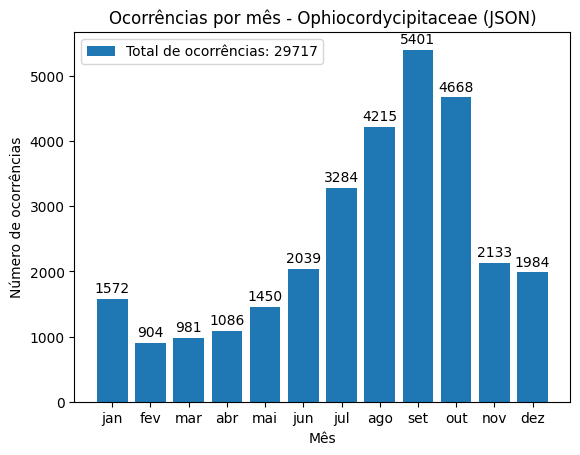

In [4]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# Carregar as ocorrências do arquivo JSON
with open("ocorrencias_ophio.json", encoding="utf-8") as f:
    ocorrencias = json.load(f)

# Extrair os meses das datas
meses = []
for record in ocorrencias:
    data = record.get('eventDate')
    if data:
        try:
            mes = datetime.fromisoformat(data[:10]).month
            meses.append(mes)
        except Exception:
            continue

# Contar ocorrências por mês
contagem = Counter(meses)
meses_labels = range(1, 13)
nomes_meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
ocorrencias_por_mes = [contagem.get(m, 0) for m in meses_labels]

total = sum(ocorrencias_por_mes)

# Plotar o gráfico
plt.bar(meses_labels, ocorrencias_por_mes, label=f'Total de ocorrências: {total}')
plt.xlabel('Mês')
plt.ylabel('Número de ocorrências')
plt.title('Ocorrências por mês - Ophiocordycipitaceae (JSON)')
plt.xticks(meses_labels, nomes_meses)

# Adicionar o valor em cada barra
for i, v in enumerate(ocorrencias_por_mes):
    plt.text(meses_labels[i], v + max(ocorrencias_por_mes)*0.01, str(v), ha='center', va='bottom')

plt.legend()
plt.show()

O código abaixo gera um gráfico que relaciona a temperatura média mensal por continente. 

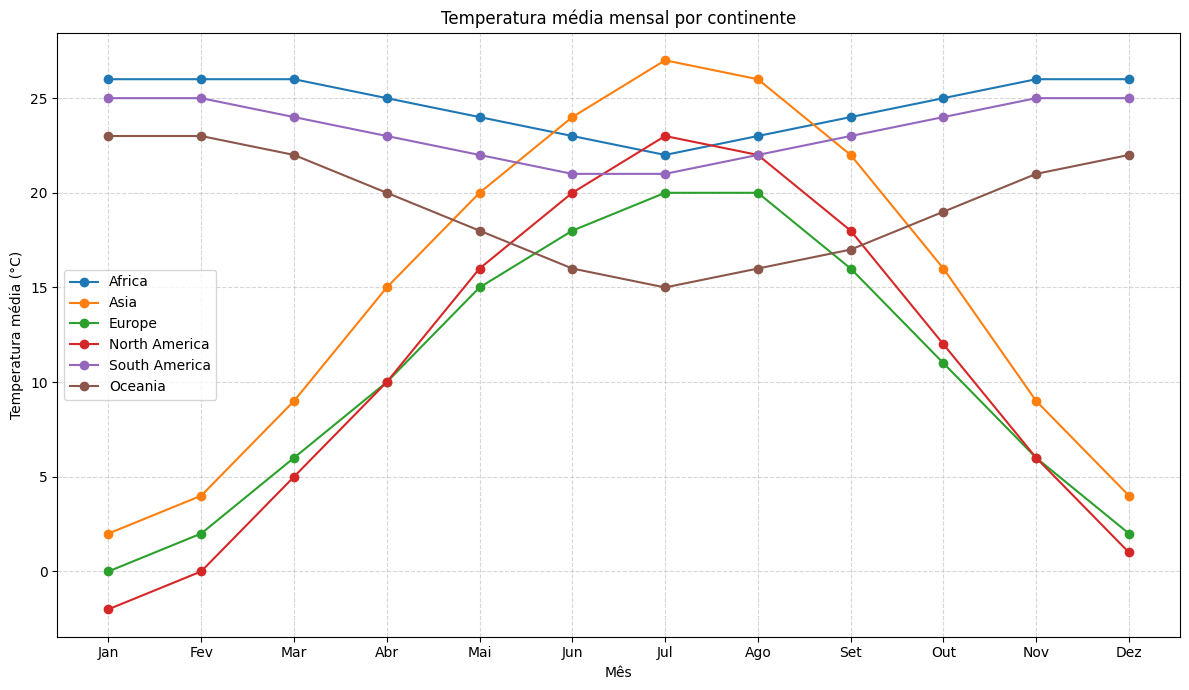

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Temperatura média mensal simulada (°C) para cada continente
temperaturas_mensais = {
    'Africa':        [26, 26, 26, 25, 24, 23, 22, 23, 24, 25, 26, 26],
    'Asia':          [2, 4, 9, 15, 20, 24, 27, 26, 22, 16, 9, 4],
    'Europe':        [0, 2, 6, 10, 15, 18, 20, 20, 16, 11, 6, 2],
    'North America': [-2, 0, 5, 10, 16, 20, 23, 22, 18, 12, 6, 1],
    'South America': [25, 25, 24, 23, 22, 21, 21, 22, 23, 24, 25, 25],
    'Oceania':       [23, 23, 22, 20, 18, 16, 15, 16, 17, 19, 21, 22],
    # 'Antarctica':    [-30, -35, -40, -45, -50, -55, -60, -60, -55, -45, -35, -30], # opcional
}

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(12,7))
for continente, temps in temperaturas_mensais.items():
    plt.plot(meses, temps, marker='o', label=continente)
plt.xlabel('Mês')
plt.ylabel('Temperatura média (°C)')
plt.title('Temperatura média mensal por continente')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O código abaixo gera um gráfico que relaciona a umidade relativa média por mês de cada continente.

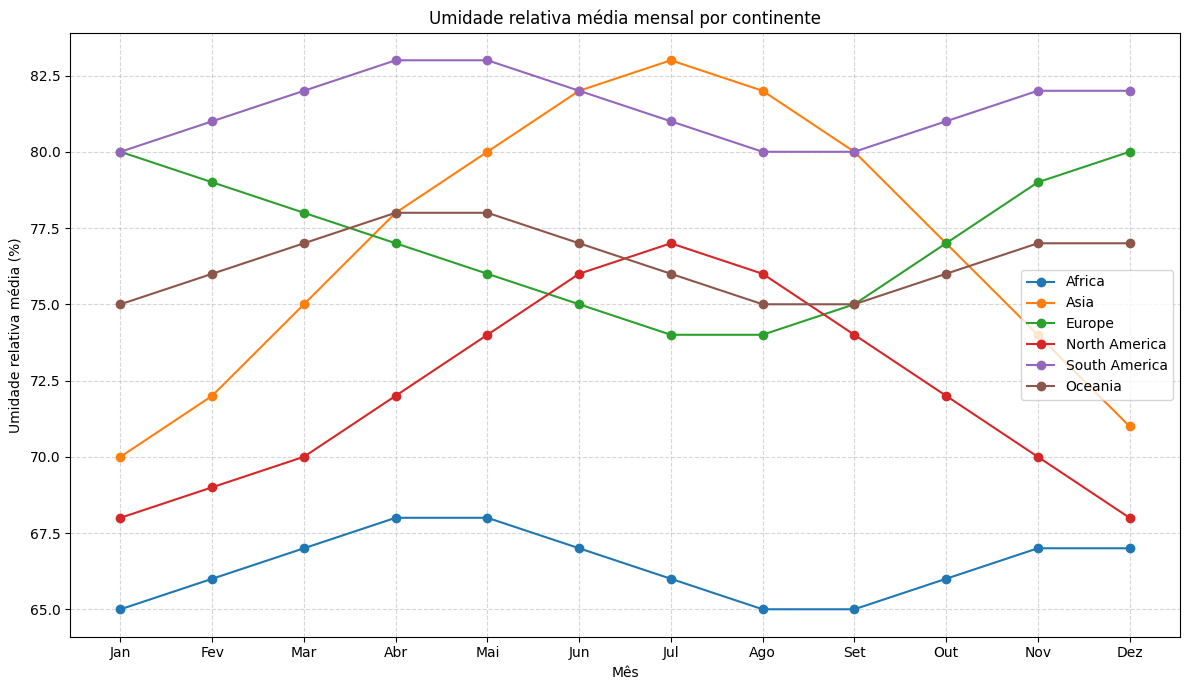

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Umidade relativa média mensal simulada (%) para cada continente
umidade_mensal = {
    'Africa':        [65, 66, 67, 68, 68, 67, 66, 65, 65, 66, 67, 67],
    'Asia':          [70, 72, 75, 78, 80, 82, 83, 82, 80, 77, 74, 71],
    'Europe':        [80, 79, 78, 77, 76, 75, 74, 74, 75, 77, 79, 80],
    'North America': [68, 69, 70, 72, 74, 76, 77, 76, 74, 72, 70, 68],
    'South America': [80, 81, 82, 83, 83, 82, 81, 80, 80, 81, 82, 82],
    'Oceania':       [75, 76, 77, 78, 78, 77, 76, 75, 75, 76, 77, 77],
    # 'Antarctica':    [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60], # opcional
}

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(12,7))
for continente, umids in umidade_mensal.items():
    plt.plot(meses, umids, marker='o', label=continente)
plt.xlabel('Mês')
plt.ylabel('Umidade relativa média (%)')
plt.title('Umidade relativa média mensal por continente')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()